1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [1]:
# !wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

--2022-11-25 10:31:48--  https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/aamg1apjhclecka/regression_generated.csv [following]
--2022-11-25 10:31:48--  https://www.dropbox.com/s/raw/aamg1apjhclecka/regression_generated.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6e7cd71f2faea13727511ca74b.dl.dropboxusercontent.com/cd/0/inline/BxbftiAqvKE3bNrF2aQixrHTyCh_pPYFpIOPhW2JQ06TZ4vYVIgoo5i-nKv55v5Q-A_j4v3cEeAVIo2I7W_xMULW06qvdaAZ2KufFsC0KNC-HRQCGrdgFFoy1eLkX-A4E2KCVtLZo0PZwktMKGxuJHV5PQj32sjse-MDkYAmgAGheA/file# [following]
--2022-11-25 10:31:49--  https://uc6e7cd71f2faea13727511ca74b.dl.dropboxusercontent.com/cd/0/inline/BxbftiAqvKE3bNrF2aQixrHTyCh_pPYFpIOPhW2JQ06TZ4vYVIgoo5i-nKv55v5Q-A_j4v

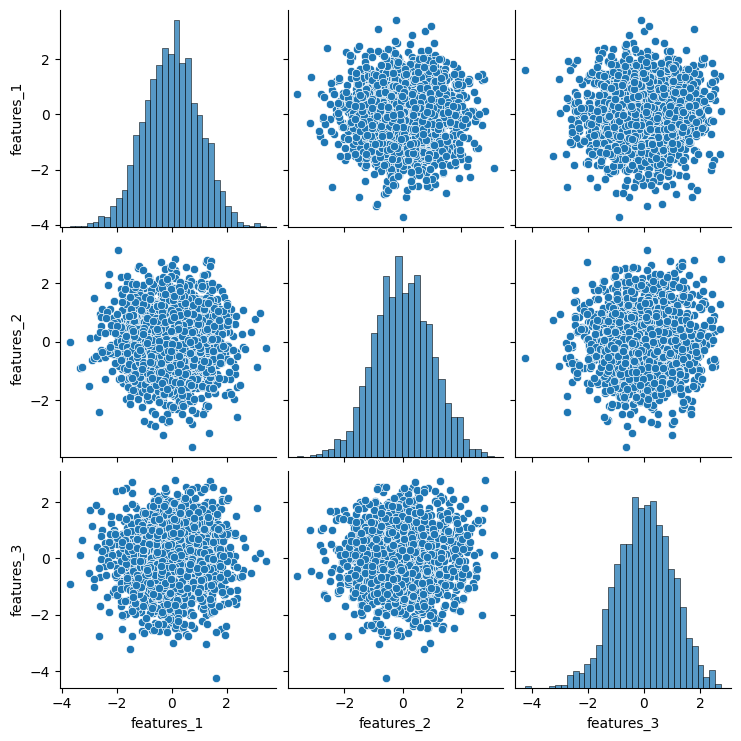

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


df_regression = pd.read_csv("regression_generated.csv")

# sns.relplot(x = "features_1", y = "features_2", data = df_regression)
# sns.relplot(x = "features_1", y = "features_3", data = df_regression)
# sns.relplot(x = "features_2", y = "features_3", data = df_regression)
sns.pairplot(df_regression[["features_1", "features_2", "features_3"]])

In [2]:
np.corrcoef(df_regression["features_1"], df_regression["features_2"])[0,1]

-0.005219711383220027

In [3]:
np.corrcoef(df_regression["features_1"], df_regression["features_3"])[0,1]

0.02369042507320444

In [4]:
np.corrcoef(df_regression["features_2"], df_regression["features_3"])[0,1]

0.04735993943504083

Are these features correlated? <br>
These features are not correlated, because the linear relationship is almost zero (for all pairs).

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

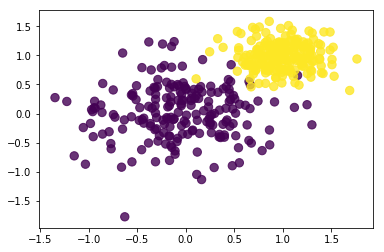

In [5]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

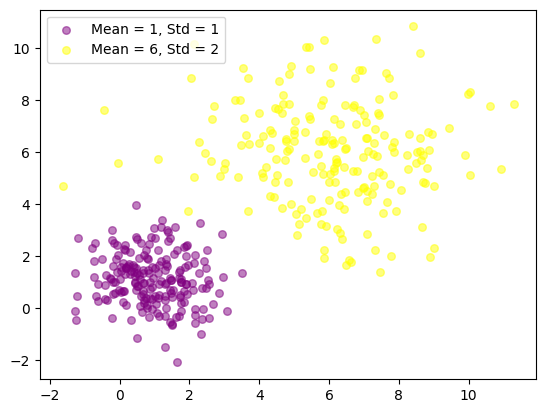

In [6]:
def generate_dataset(mean, std):
    n_category = 2    
    datasets = []
    for i in range(n_category):
        datasets.append(np.random.normal(mean, std, 200))
    return datasets

mean_1 = 1
mean_2 = 6
std_1 = 1
std_2 = 2
dataset_1 = generate_dataset(mean_1, std_1)
dataset_2 = generate_dataset(mean_2, std_2)

import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(dataset_1[0], dataset_1[1], s=30, c='purple', label='Mean = 1, Std = 1', alpha=0.5)
plt.scatter(dataset_2[0], dataset_2[1], s=30, c='yellow', label='Mean = 6, Std = 2', alpha=0.5)
plt.legend(loc='upper left')
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [2]:
# !wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2022-11-25 10:44:13--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-11-25 10:44:13--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd545c6ea656fc406368f282343.dl.dropboxusercontent.com/cd/0/inline/BxZgS94bakU66htx9oeEP3yuZy6QowXlItbZ8zjyZtqYf199eP8fLXKLRvMiBDsGp6e3LVp84ltl7PDqaYXqE4pNiuy89gU_NlYlHZSy_-KJK8ZZa1o5F3Oji1_7RaeFkwPCCcjyHDi7vbMwtv8Wh1guljcPVQXtnQsIuTTGmgK3Pg/file# [following]
--2022-11-25 10:44:13--  https://ucd545c6ea656fc406368f282343.dl.dropboxusercontent.com/cd/0/inline/BxZgS94bakU66htx9oeEP3yuZy6QowXlItbZ8zjyZtqYf199eP8fLXKLRvMiBDsGp6e3LVp84ltl7PDqaYXqE4pNiuy

In [7]:
np_residuals = pd.read_pickle("data/residuals_261.pkl")
df_residuals = pd.DataFrame(np_residuals.item(), columns = ['residuals','distances'])
df_residuals.head()

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


In [8]:
df_residuals_2 = df_residuals[np.abs(df_residuals['residuals']) < 2]
df_residuals_2

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


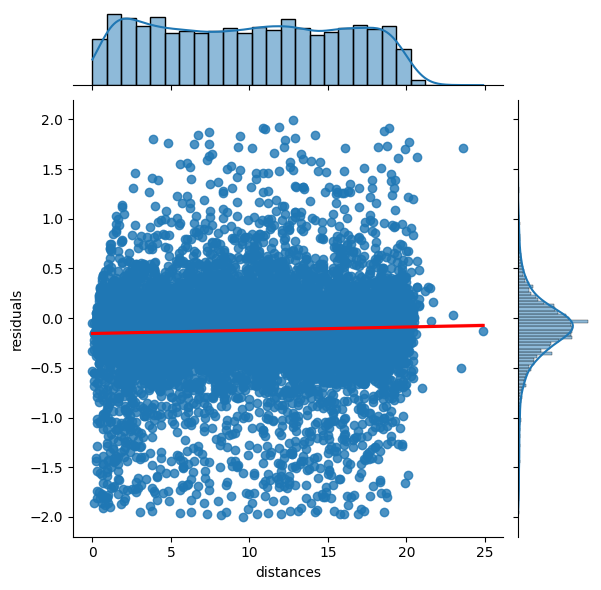

In [9]:
sns.jointplot(x="distances", y="residuals", data=df_residuals_2, kind="reg", joint_kws={'line_kws':{'color':'red'}})

In [10]:
np.corrcoef(df_residuals_2["distances"], df_residuals_2["residuals"])[0,1]
# These features are not corralated, because the linear relationship is almost zero.

0.043403510522559086

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


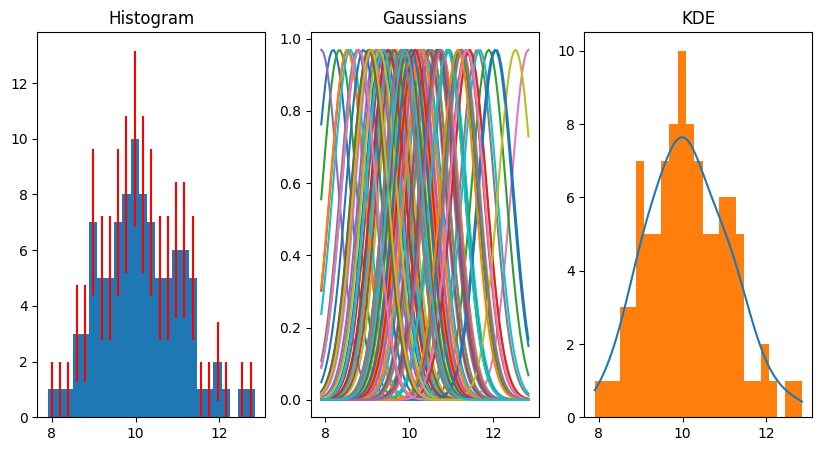

In [11]:
import scipy as sp

mean = 10
std = 1
size = 100
n_bins = int(size/4)

x = np.random.normal(mean, std, size)

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 5))

bins = axes[0].hist(x, bins = n_bins)
axes[0].set_title('Histogram')
axes[0].yaxis.tick_left()  
error = np.sqrt(bins[0])
bins_center = (bins[1][:-1] + bins[1][1:])/2
axes[0].errorbar(bins_center, bins[0], yerr = error, fmt = 'none', c = 'r')
    
std_default = 1.06 * x.std()*(x.size**(-1/5))
x_grid = np.linspace(np.min(x), np.max(x), size)

gaussians = []
for sample in x:
    gaussian = sp.stats.norm.pdf(x_grid, sample, scale = std_default)
    gaussians.append(gaussian)
    axes[1].plot(x_grid, gaussian)
    
axes[1].set_title('Gaussians')
axes[1].yaxis.tick_left() 

sum_integral = np.sum(gaussians, axis = 0)
area_sum_integral = sp.integrate.trapz(np.sum(gaussians, axis = 0), x_grid)
area_hist = sum(np.diff(bins[1])*bins[0])
k_norm = area_sum_integral / area_hist
norm_sum_integral = sum_integral / k_norm

axes[2].set_title('KDE')
axes[2].plot(x_grid, norm_sum_integral)
axes[2].hist(x, bins=n_bins)
axes[2].yaxis.tick_left()